In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
#Loading the Excel sheets
measurements_data = pd.read_excel("/Users/yaeesh/Desktop/Git/question_1_2 (1).xlsx", sheet_name="Measurements")
specifications_data = pd.read_excel("/Users/yaeesh/Desktop/Git/question_1_2 (1).xlsx", sheet_name="Specifications")

In [9]:
#Merging two data frames, then creating a new column to include whether a product is defective or not
merged_data = measurements_data.merge(specifications_data, on="Product Code")
merged_data["Defective"] = (merged_data["T_Height"] > merged_data["Height_USL"]) | (merged_data["T_Height"] < merged_data["Height_LSL"]) | \
                           (merged_data["T_Weight"] > merged_data["Weight_USL"]) | (merged_data["T_Weight"] < merged_data["Weight_LSL"])

In [10]:
#Counting the defective parts for each product and then sorting them in descending order
defective_counts = merged_data.groupby("Product Code")["Defective"].sum().sort_values(ascending=False)

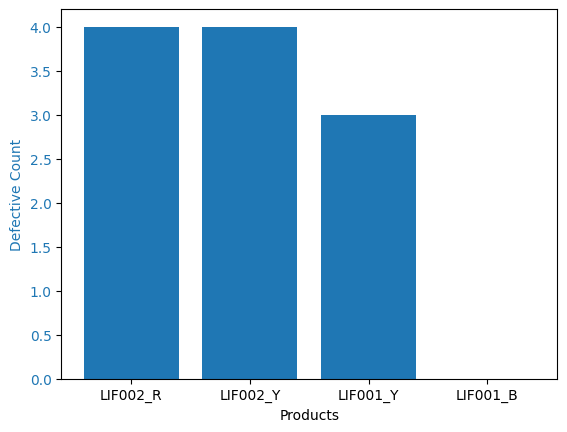

In [11]:
#Creating the pareto chart
fig, ax1 = plt.subplots()

ax1.bar(defective_counts.index, defective_counts, color='tab:blue')
ax1.set_xlabel('Products')
ax1.set_ylabel('Defective Count', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')